In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('../Data/train.csv')

In [3]:
df.info()
df.drop(columns=['Team 1', 'Team2'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7443 entries, 0 to 7442
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       7443 non-null   int64  
 1   date         7443 non-null   object 
 2   league_id    7443 non-null   int64  
 3   league       7443 non-null   object 
 4   Team 1       7443 non-null   object 
 5   Team2        7443 non-null   object 
 6   SPI1         7443 non-null   float64
 7   SPI2         7443 non-null   float64
 8   proj_score1  7443 non-null   float64
 9   proj_score2  7443 non-null   float64
 10  importance1  2527 non-null   float64
 11  importance2  2527 non-null   float64
 12  score1       2643 non-null   float64
 13  score2       2643 non-null   float64
 14  xg1          1715 non-null   float64
 15  xg2          1715 non-null   float64
 16  nsxg1        1715 non-null   float64
 17  nsxg2        1715 non-null   float64
 18  adj_score1   1715 non-null   float64
 19  adj_sc

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026E39420C40>,
      dtype=object)

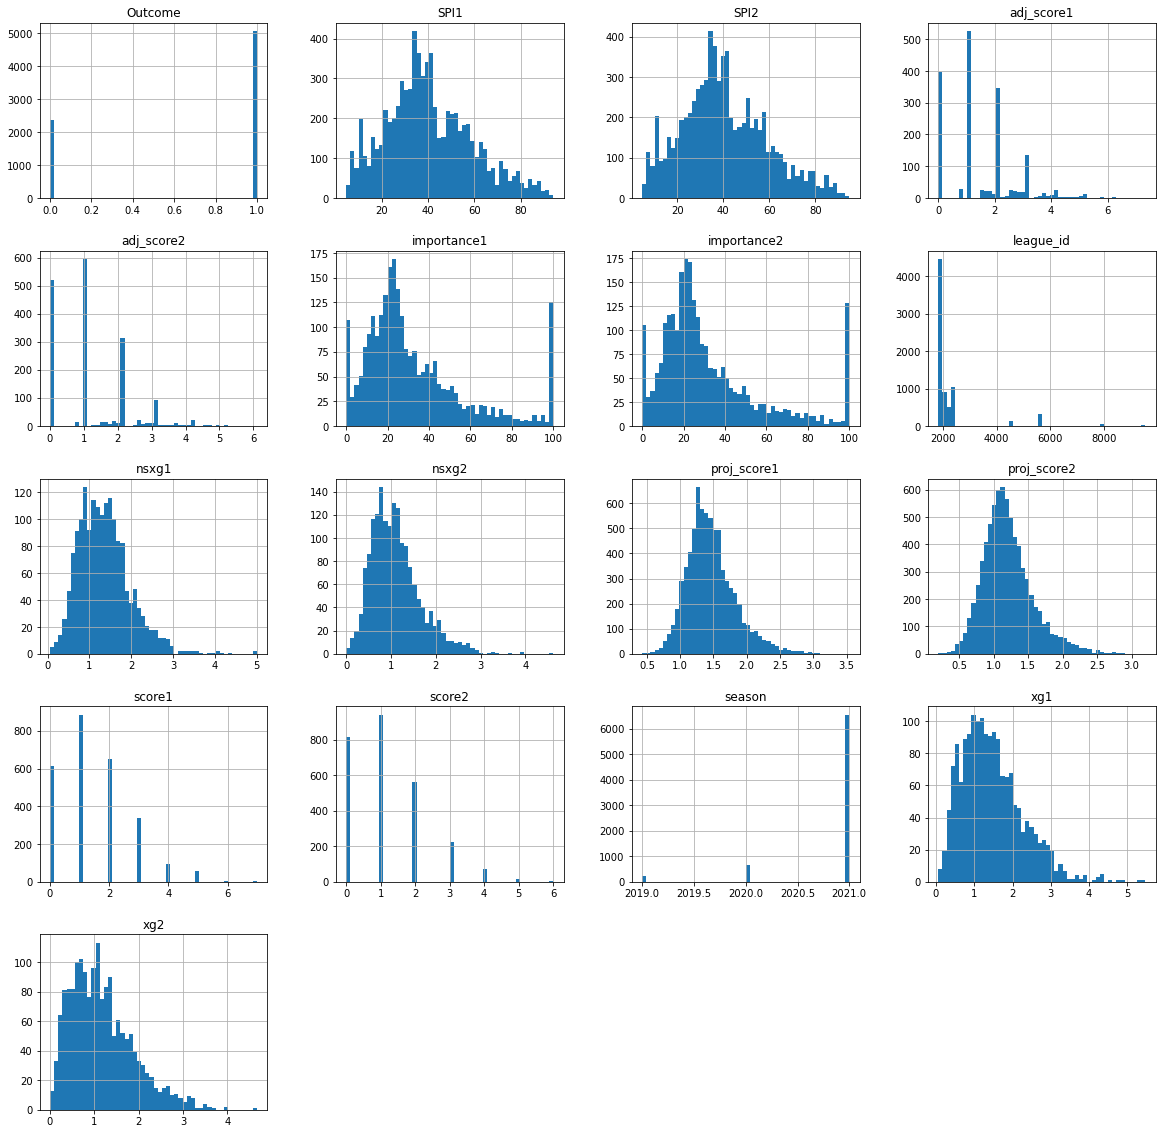

In [4]:
df.hist(figsize=(20, 20), bins=50)

In [63]:
cat_cols = list(df.select_dtypes('object').columns)
cat_cols = cat_cols + ['season']
cat_cols.remove('date')

ValueError: list.remove(x): x not in list

In [6]:
for x in cat_cols:
    print(f"""
    {df[x].value_counts(ascending=False)}
    
    """)


    United Soccer League                        496
Major League Soccer                         459
Brasileiro Série A                          380
Japanese J League                           380
APD                                         325
English League Championship                 264
English League One                          264
English League Two                          252
Swedish Allsvenskan                         240
Chinese Super League                        240
Norwegian Tippeligaen                       240
Spanish Segunda Division                    220
UEFA Europa League                          204
French Ligue 1                              180
French Ligue 2                              180
Mexican Primera Division Torneo Clausura    171
Italy Serie B                               170
Spanish Primera Division                    170
Italy Serie A                               170
BJL                                         162
AAL                                

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
def ConvertUnix(x):
    y = pd.Timestamp(x).timestamp()
    y = int(y)
    return y

df['date'] = df['date'].apply(ConvertUnix)

df['date'] = 1 / df['date']

In [9]:
num_cols = list(df.select_dtypes(include=['int64', 'float64']).columns)
num_cols.remove('season')
num_cols.remove('Outcome')


root_cols = [
    'SPI1',
    'SPI2',
    'proj_score1',
    'proj_score2',
    'importance1',
    'importance2',
    'xg1',
    'xg2',
    'nsxg1',
    'nsxg2',
    'score1',
    'score2'
]

In [10]:
df.isnull().sum().sort_values(ascending=False)

adj_score1     5728
nsxg2          5728
nsxg1          5728
xg2            5728
xg1            5728
adj_score2     5728
importance2    4916
importance1    4916
score2         4800
score1         4800
SPI1              0
date              0
league_id         0
league            0
Outcome           0
SPI2              0
proj_score1       0
proj_score2       0
season            0
dtype: int64

In [11]:
null_cols = [
    'adj_score1',
    'nsxg2',
    'nsxg1',
    'xg2',
    'xg1',
    'adj_score2',
    'importance2',
    'importance1',
]

log_cols = [
    'adj_score1',
    'adj_score2',
]

In [12]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])
df

,season,date,league_id,league,SPI1,SPI2,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,Outcome
0,2019,6.466324e-10,1979.0,Chinese Super League,48.22,37.83,1.75,0.84,45.900000,22.100000,1.000000,0.000000,1.390000,0.260000,2.050000,0.5400,1.05000,0.00,1
1,2019,6.466324e-10,1979.0,Chinese Super League,39.81,60.08,1.22,1.89,25.600000,63.400000,0.000000,4.000000,0.570000,2.760000,0.800000,1.5000,0.00000,3.26,0
2,2019,6.466324e-10,1979.0,Chinese Super League,65.59,39.99,2.58,0.62,77.100000,28.800000,3.000000,0.000000,0.490000,0.450000,1.050000,0.7500,3.15000,0.00,1
3,2019,6.466324e-10,1979.0,Chinese Super League,32.25,54.82,1.10,1.79,35.800000,58.900000,0.000000,1.000000,1.120000,0.970000,1.510000,0.9400,0.00000,1.05,0
4,2019,6.466324e-10,1979.0,Chinese Super League,38.24,40.45,1.57,1.24,26.200000,21.300000,2.000000,2.000000,2.770000,3.170000,1.050000,2.0800,2.10000,2.10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7438,2021,6.100287e-10,1846.0,German 2. Bundesliga,34.05,33.76,1.39,1.19,32.668421,31.957776,1.482785,1.196746,1.462035,1.169376,1.360292,1.1087,1.51014,1.23,1
7439,2021,6.100287e-10,1846.0,German 2. Bundesliga,36.73,36.11,1.67,1.44,32.668421,31.957776,1.482785,1.196746,1.462035,1.169376,1.360292,1.1087,1.51014,1.23,1
7440,2021,6.099644e-10,1983.0,South African ABSA Premier League,12.97,23.59,1.05,1.50,32.668421,31.957776,1.482785,1.196746,1.462035,1.169376,1.360292,1.1087,1.51014,1.23,0
7441,2021,6.099644e-10,1983.0,South African ABSA Premier League,11.76,18.07,1.22,1.46,32.668421,31.957776,1.482785,1.196746,1.462035,1.169376,1.360292,1.1087,1.51014,1.23,0


In [13]:
df[root_cols] = np.sqrt(df[root_cols])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026E80A40250>,
      dtype=object)

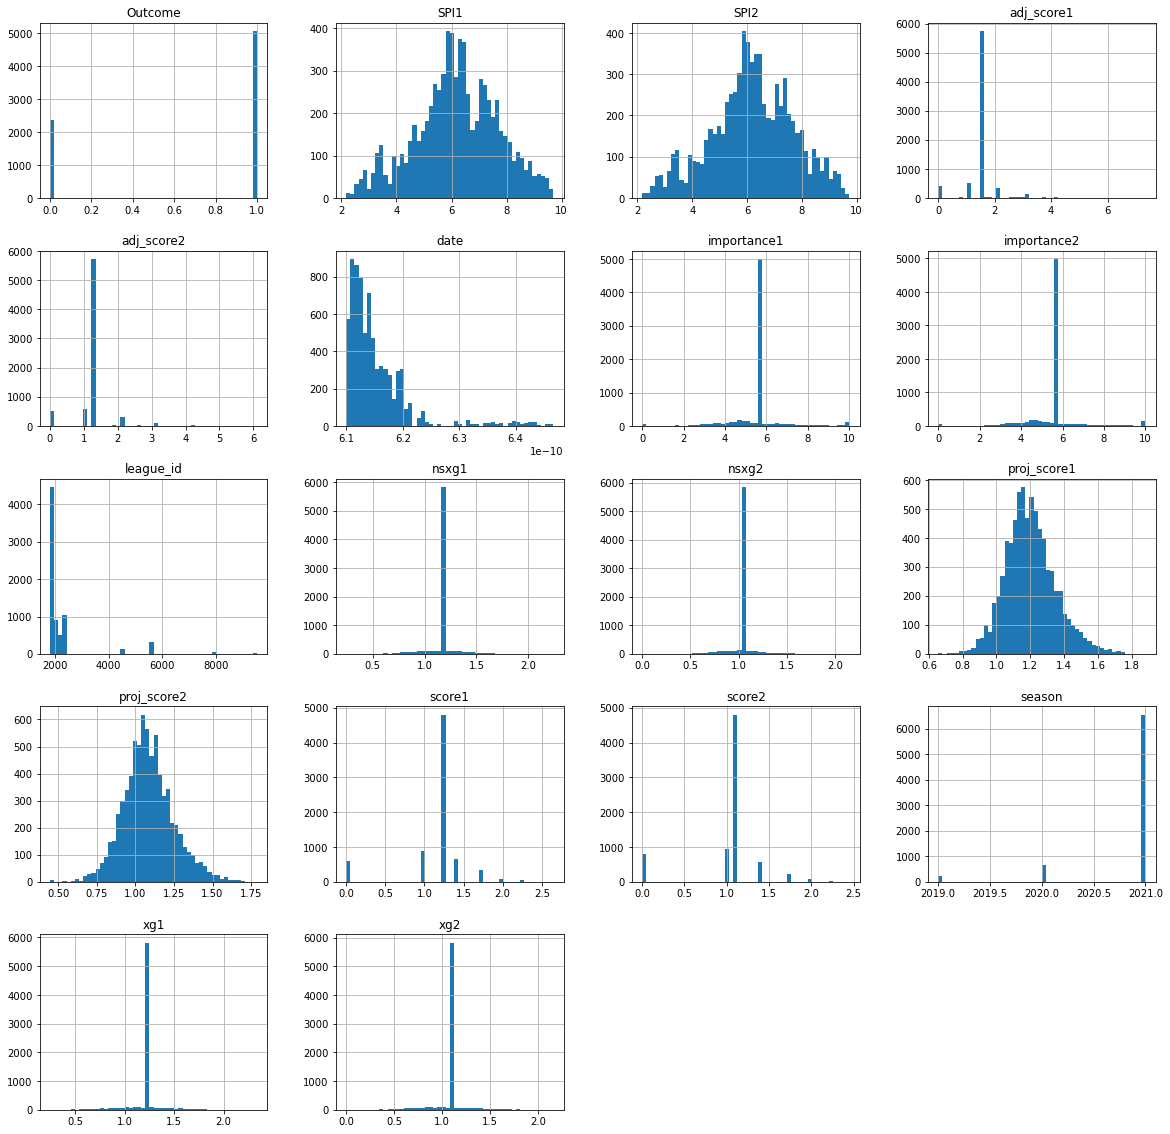

In [14]:
df.hist(figsize=(20,20), bins=50)

# Preprocessing

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

X = df.drop(columns=['Outcome'])
y = df[['Outcome']]

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

full_pipeline = ColumnTransformer([
    ('roots', num_pipeline, root_cols),
    ('nums', num_pipeline, num_cols),
    ('cat', OneHotEncoder(), cat_cols)
])

In [16]:
X_trans = full_pipeline.fit_transform(X)

In [17]:
y = np.asarray(y)

# Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=42, shuffle=True)

array([[-0.21340742, -0.21466756,  0.29668178, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.16393315,  0.81434626,  0.58829477, ...,  0.        ,
         0.        ,  1.        ],
       [-0.53241797, -0.7645955 , -0.08986908, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.27879611,  1.14383404, -0.89396485, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.65693634,  0.65090125, -0.98894713, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.37028311,  1.889956  ,  0.29668178, ...,  0.        ,
         1.        ,  0.        ]])

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()

base_model = rf.fit(X_train, y_train)

In [ ]:
predictions = base_model.predict_proba(X_test)

cross_val_score(base_model, X_test, y_test, cv=5, scoring='neg_log_loss').mean()

# Neural Network

In [19]:
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from datetime import datetime

today = datetime.today()
today = str(today.date()) + ' ' + str(today.hour) + '-' + str(today.minute)

In [20]:
today

'2021-08-24 21-12'

In [21]:
mc = ModelCheckpoint(f'../Models/soccer_model {today}.h5', 
                     monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [22]:
X_train.shape

(5954, 70)

In [43]:
model = keras.Sequential([
    keras.layers.Dense(75, activation='relu', input_dim=70),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(600, activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(250, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [44]:
model.compile(optimizer='adam',
             loss=keras.losses.BinaryCrossentropy(),
             metrics=[keras.metrics.BinaryCrossentropy(), 'accuracy'])

In [45]:
history = model.fit(
    X_train,
    y_train,
    batch_size=200,
    epochs=150,
    validation_data=(X_test, y_test),
    shuffle=True,
    callbacks=mc)

Epoch 1/150
30/30 [==============================] - 1s 15ms/step - loss: 0.2325 - binary_crossentropy: 0.2325 - accuracy: 0.9157 - val_loss: 0.1059 - val_binary_crossentropy: 0.1059 - val_accuracy: 0.9631

Epoch 00001: val_loss did not improve from 0.05808
Epoch 2/150
30/30 [==============================] - 0s 9ms/step - loss: 0.0852 - binary_crossentropy: 0.0852 - accuracy: 0.9667 - val_loss: 0.0758 - val_binary_crossentropy: 0.0758 - val_accuracy: 0.9704

Epoch 00002: val_loss did not improve from 0.05808
Epoch 3/150
30/30 [==============================] - 0s 9ms/step - loss: 0.0658 - binary_crossentropy: 0.0658 - accuracy: 0.9746 - val_loss: 0.0994 - val_binary_crossentropy: 0.0994 - val_accuracy: 0.9738

Epoch 00003: val_loss did not improve from 0.05808
Epoch 4/150
30/30 [==============================] - 0s 10ms/step - loss: 0.0485 - binary_crossentropy: 0.0485 - accuracy: 0.9812 - val_loss: 0.0617 - val_binary_crossentropy: 0.0617 - val_accuracy: 0.9805

Epoch 00004: val_loss

KeyboardInterrupt: 

In [75]:
model = load_model(f'../Models/soccer_model {today}.h5')

# Run on Test Data

In [76]:
test = pd.read_csv('../Data/test.csv')

In [77]:
test.drop(columns=['Team 1', 'Team2'], inplace=True)

In [78]:
test['date'] = pd.to_datetime(test['date'])

In [79]:
def ConvertUnix(x):
    y = pd.Timestamp(x).timestamp()
    y = int(y)
    return y

test['date'] = test['date'].apply(ConvertUnix)

test['date'] = 1 / test['date']

In [80]:
test

,season,date,league_id,league,SPI1,SPI2,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2021,6.099644e-10,2411,BPL,79.65,74.06,1.67,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,6.099644e-10,2411,BPL,74.19,71.14,1.35,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,6.099644e-10,2411,BPL,60.67,71.45,1.18,1.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,6.099644e-10,2411,BPL,76.88,79.06,1.52,1.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,6.099644e-10,2411,BPL,63.53,85.58,0.95,1.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4003,2021,6.046745e-10,1871,Spanish Segunda Division,41.51,48.12,1.40,1.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,2021,6.046745e-10,1871,Spanish Segunda Division,26.77,33.53,1.17,1.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,2021,6.046745e-10,1871,Spanish Segunda Division,26.62,28.65,1.31,1.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,2021,6.046745e-10,1871,Spanish Segunda Division,33.74,30.32,1.33,0.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
test[num_cols] = imputer.transform(test[num_cols])

In [82]:
test[root_cols] = np.sqrt(test[root_cols])

In [83]:
test = full_pipeline.transform(test)

In [84]:
test

array([[ 1.83288199,  1.61864163,  0.6143192 , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.62489348,  1.5040859 , -0.26139323, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.07421802,  1.51635783, -0.76924515, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.68258807, -0.55619557, -0.37786867, ...,  0.        ,
         0.        ,  1.        ],
       [-0.24889984, -0.45338453, -0.319412  , ...,  0.        ,
         0.        ,  1.        ],
       [-0.48863581, -0.45763625, -0.17516501, ...,  0.        ,
         0.        ,  1.        ]])

In [85]:
predictions = model.predict(test)

In [86]:
submission = pd.DataFrame(predictions, columns=['Outcome'])

In [89]:
submission.to_csv(f"../Submissions/{today} Submission.csv", index=False)

In [87]:
predictions

array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [88]:
submission['Outcome'].value_counts()

1.000000    2691
0.000000    1078
0.032301       1
0.006633       1
0.371762       1
            ... 
0.426946       1
0.074509       1
0.417160       1
0.560874       1
0.982230       1
Name: Outcome, Length: 241, dtype: int64